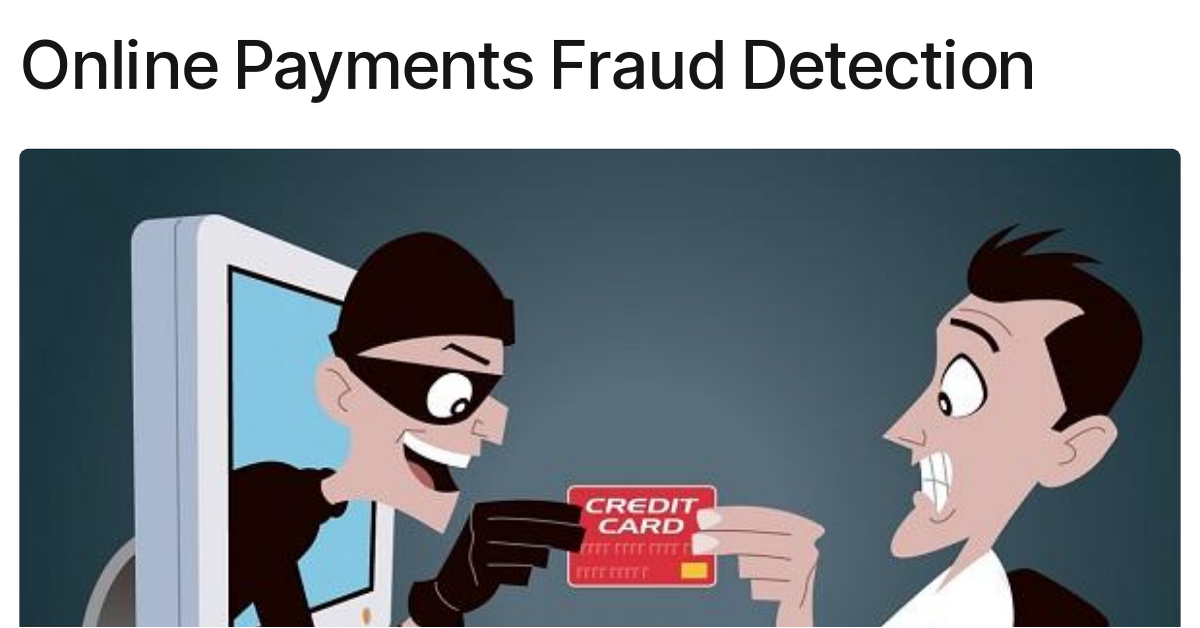





To identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments

The introduction of online payment systems has helped a lot in the ease of payments. But, at the same time, it increased in payment frauds. Online payment frauds can happen with anyone using any payment system, especially while making payments using a credit card. That is why detecting online payment fraud is very important for credit card companies to ensure that the customers are not getting charged for the products and services they never paid.

To identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments

## 1.Importing data & Preprocessing

- Data Collection and Preprocessing: Gather data relevant to online transactions and their corresponding labels (fraudulent or non-fraudulent). This data may include features such as transaction amount, payment type, step (1 step = 1hour),name etc. - - - - Preprocess the data by handling missing values, normalizing or scaling the features, and encoding categorical variables

In [1]:
#importing pandas and numpy
import pandas as pd
import numpy as np
import os
data = pd.read_csv("C:\\Users\\ASHU\\projects\\Fraud prediction\\data\\credit card.csv")
data  

C:\Users\ASHU\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


- step: represents a unit of time where 1 step equals 1 hour
- type: type of online transaction
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction
- isFraud: fraud transaction

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
#checking the null values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
#checking duplicate value
data.duplicated().sum()

0

In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## 2.Exploratory  Data Analysis

In [6]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

- Here we can see that our data is highly imbalanced so we will perform undersampling to balance the data.
- Let's say minority class=1 & majority class=0 in the isFraud feature

In [7]:
# Calculate the class distribution
class_counts = data['isFraud'].value_counts()
print('Class distribution:')
print(class_counts)

#ratio to balance the data
desired_ratio = 0.5  
num_minority = class_counts[1]  
num_majority_desired = int(num_minority / desired_ratio)
majority_class = data[data['isFraud'] == 0]
sampled_majority = majority_class.sample(n=num_majority_desired, random_state=1)
minority_class = data[data['isFraud'] == 1]
df = pd.concat([sampled_majority, minority_class])
df = df.sample(frac=1, random_state=1).reset_index(drop=True)

print("After performing undersampling")


balanced_class_counts = df['isFraud'].value_counts()
print('\nBalanced class distribution:')
print(balanced_class_counts)


Class distribution:
isFraud
0    6354407
1       8213
Name: count, dtype: int64
After performing undersampling

Balanced class distribution:
isFraud
0    16426
1     8213
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x24ad1ea2790>,
 [Text(-0.5500000594609755, 0.9526279098330699, 'Not Fraud'),
  Text(0.5500001486524352, -0.9526278583383436, 'Fraud')],
 [Text(-0.30000003243325934, 0.5196152235453108, '66.67'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33')])

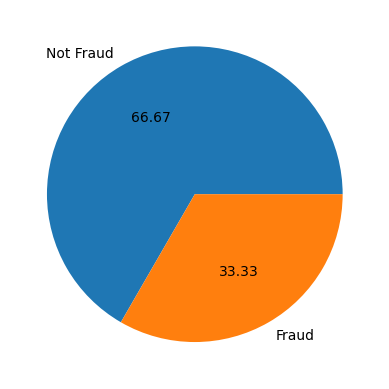

In [8]:
#imporitng libraries for analysis through charts & graphs
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
plt.pie(df['isFraud'].value_counts(),labels=['Not Fraud','Fraud'],autopct="%0.2f")

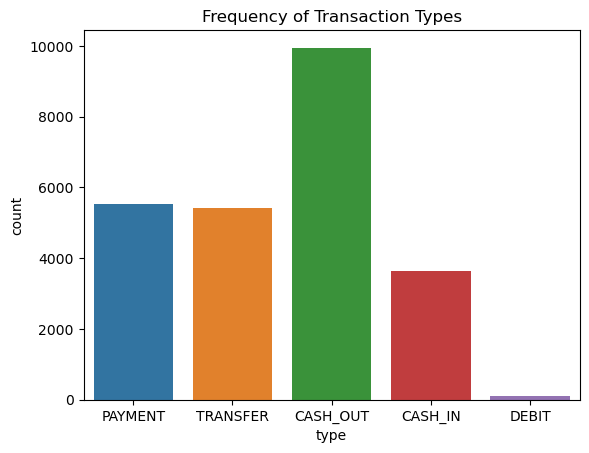

In [9]:
#analysing the frequency of transaction type
sns.countplot(x='type', data=df)
plt.title('Frequency of Transaction Types')
plt.show()

- The frequency of Cash out is more than any other type of transaction.
- Frequency of payment and transfer nearly same.

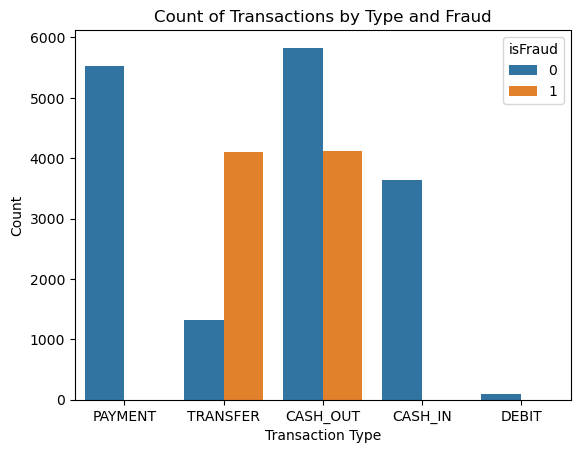

In [10]:
#analysing maximum and minimum fraud happening in different transaction types.
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Count of Transactions by Type and Fraud')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

- The maximum number of fraud happens in cash out and in transfer transaction.
- No fraud happens in debit,cash in and in payment.

C:\Users\ASHU\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASHU\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASHU\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are igno

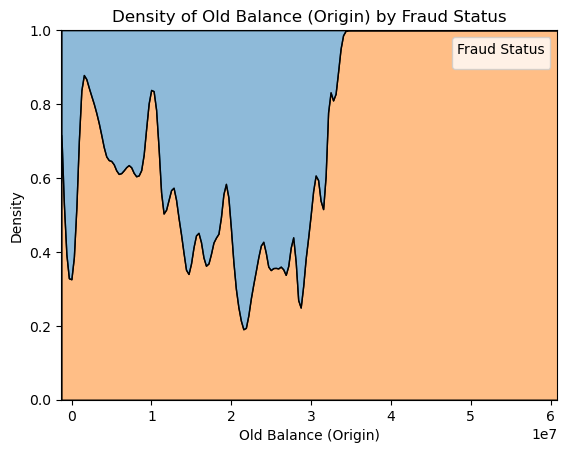

In [11]:
# Density plot of oldbalanceOrg for isFraud=1 and isFraud=0
sns.kdeplot(data=df, x='oldbalanceOrg', hue='isFraud', multiple="fill", common_norm=False, alpha=0.5)
plt.title('Density of Old Balance (Origin) by Fraud Status')
plt.xlabel('Old Balance (Origin)')
plt.ylabel('Density')
plt.legend(title='Fraud Status')
plt.show()

- Fraud is high when you have large amount of old balance in your account.

In [12]:
# Check effectiveness of flagged fraud
flagged_fraud_effectiveness = df.groupby('isFlaggedFraud')['isFraud'].count()
print("Effectiveness of Flagged Fraud:")
print(flagged_fraud_effectiveness)

Effectiveness of Flagged Fraud:
isFlaggedFraud
0    24623
1       16
Name: isFraud, dtype: int64


Effectiveness of Flag is very bad for identifying Frauds.

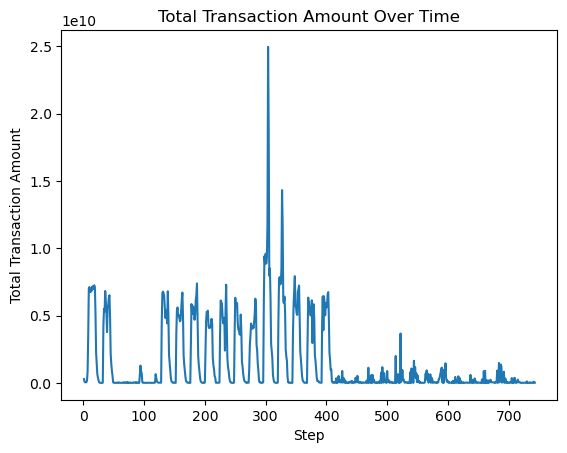

In [13]:
#groupong by 'step' and calculate the total transaction amount per step
total_amount_over_time = data.groupby('step')['amount'].sum()
plt.figure()
total_amount_over_time.plot()
plt.title('Total Transaction Amount Over Time')
plt.xlabel('Step')
plt.ylabel('Total Transaction Amount')
plt.show()

Transaction amount is high at 300 step where 1 step indicate 1 hour, hence chances of fraud will also be high.

Non-numeric columns: Index(['type', 'nameOrig', 'nameDest'], dtype='object')


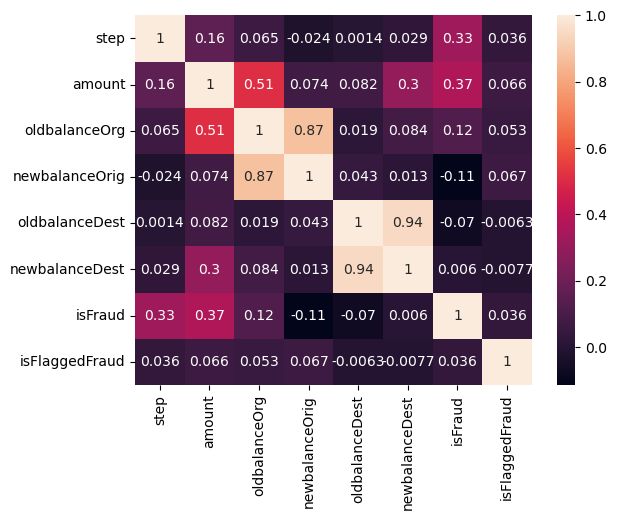

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Check for non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols)

# If there are non-numeric columns, decide how to handle them
if len(non_numeric_cols) > 0:
    #Remove rows with non-numeric values
    df_numeric = df.select_dtypes(include=[np.number])  # Select only numeric columns
    df_numeric.dropna(inplace=True)  # Remove rows with NaN values

    # Retry correlation analysis
    correlation_matrix = df_numeric.corr()
    plt.figure()
    sns.heatmap(correlation_matrix, annot=True)
    plt.show()
else:
    # If all columns are numeric, proceed with correlation analysis directly
    correlation_matrix = df.corr()
    plt.figure()
    sns.heatmap(correlation_matrix, annot=True)
    plt.show()


### Now let’s transform the categorical features into numerical. Here I will also transform the values of the isFraud column into No Fraud and Fraud labels to have a better understanding of the output:

In [15]:
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})

#mapping no fraud in place of 0 and fraud in place of 1.
df["isFraud"] = df["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(df.head())

   step  type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   142     2   25952.57  C1157738839      201128.00       175175.43   
1   380     4   70125.14   C292281038       70125.14            0.00   
2   366     4  500003.56   C342198691      500003.56            0.00   
3   429     2   11985.01  C1094187334       21816.32         9831.31   
4   178     1  103320.92   C604084684           0.00            0.00   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0   M559360306            0.00             0.0  No Fraud               0  
1  C1409481087            0.00             0.0     Fraud               0  
2    C87161857            0.00             0.0     Fraud               0  
3  M1643304508            0.00             0.0  No Fraud               0  
4  C1002361204       676222.88        779543.8  No Fraud               0  


In [16]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,142,2,25952.57,C1157738839,201128.00,175175.43,M559360306,0.00,0.00,No Fraud,0
1,380,4,70125.14,C292281038,70125.14,0.00,C1409481087,0.00,0.00,Fraud,0
2,366,4,500003.56,C342198691,500003.56,0.00,C87161857,0.00,0.00,Fraud,0
3,429,2,11985.01,C1094187334,21816.32,9831.31,M1643304508,0.00,0.00,No Fraud,0
4,178,1,103320.92,C604084684,0.00,0.00,C1002361204,676222.88,779543.80,No Fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
24634,398,1,24564.26,C1021904889,0.00,0.00,C1971597573,2332382.37,2356946.63,No Fraud,0
24635,71,1,2949339.09,C874465366,2949339.09,0.00,C1545590429,167663.32,3117002.41,Fraud,0
24636,373,2,15897.39,C358656625,13341.00,0.00,M1451313308,0.00,0.00,No Fraud,0
24637,321,1,60190.73,C450484587,0.00,0.00,C421726932,660660.13,720850.86,No Fraud,0


## 3.Splitting data into Training and Testing
- Splitting our data into training and testing.
- Size of training data is 80% and size of testing data is 20%.

In [28]:
#importing libraries to split data
from sklearn.model_selection import train_test_split
x = np.array(df[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(df[["isFraud"]])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

## Using Decision Tree Classifier

- Decision Tree classifier: Utilize the Decision Tree classifier to model the data. A Decision Tree works by creating a tree-like model of decisions based on the features. The goal is to split the data in a way that helps classify the transactions as fraudulent or non-fraudulent.
- Gini Impurity: Gini impurity is a measure of how often a randomly chosen element would be incorrectly classified in the data. The Decision Tree uses Gini impurity to evaluate how to split the data. For each split, the tree aims to minimize the impurity of the resulting sub-nodes. Lower Gini impurity indicates a better split.
- Training the Model: Train the Decision Tree classifier on a subset of the data, using the Gini impurity criterion to choose the best splits.

In [29]:
#importing libraries for decision trees
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [30]:
#using gini impurity criteria
model=DecisionTreeClassifier(criterion='gini',random_state=10,max_depth=6,min_samples_leaf=8)

In [31]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=10)

In [32]:
y_pred=model.predict(x_test)
y_pred

array(['No Fraud', 'No Fraud', 'No Fraud', ..., 'Fraud', 'No Fraud',
       'No Fraud'], dtype=object)

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test and y_pred are your true labels and predicted labels
# Calculate precision, recall, and F-score with zero_division parameter

precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9817286963542456
Recall: 0.9809253246753247
F1 Score: 0.9810319701933008


In [34]:
#confusion matrix of our model
print(confusion_matrix(y_test,y_pred))

[[1666    6]
 [  88 3168]]


In [35]:
model.score(x_test,y_test)

0.9809253246753247

- Accuracy of our model is 98%

#### Let's check our prediction on new data

In [39]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
#In type = "CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5

features = np.array([[1, 9000.60, 8800.60, 200.0]])
print(model.predict(features))

['No Fraud']


In [40]:
features = np.array([[1, 9000.60, 8800.60, 10.0]])
print(model.predict(features))

['Fraud']


In [38]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


## 4.Summary

Our project includes data preprocessing steps such as handling missing values and feature scaling to ensure the model's robustness and then we have performed Exploratory Data Aalysis to analyse our data for important insights.Then spitting our data into training and testing.Then the decision tree classifier is then trained on the preprocessed data and validated to optimize its performance.

Overall, the project aims to identify fraudulent transactions with high accuracy and low false-positive rates, providing an efficient tool for fraud detection.
This is how we can detect online payments fraud with machine learning using Python. Detecting online payment frauds is one of the applications of data science in finance.

### Here we can see that our model is working properly.

### Now we will deploy our model...........